### Imports and environemnt setup

In [1]:
import utils 
import pandas as pd

import sklearn

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor, RadiusNeighborsRegressor

from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

import numpy as np
import hopsworks

In [2]:
from_csv = False
csv_path = 'movies_2023-04-30_2023-01-01_20_0END.csv'
scaling_factor = 1000000

### Get data from API or load csv

In [7]:
nb_pages = 1
first_page = 0

lte_release_date = '2000-12-31'
gte_release_date = '2000-01-01'

In [8]:
if from_csv:
    movies_df = pd.read_csv(csv_path)
else:
    movies_dict = utils.get_movies_list(lte_release_date, gte_release_date, nb_pages, first_page)
    all_movie_details = []
    for i in range(len(movies_dict)):
        print(f'Extracting features of film {i} ------')
        movie_id = movies_dict[i]['id'] 
        movie_details = utils.extract_features(movie_id)
        if movie_details == -1:
            # We reached the last movie with revenues
            break
        elif not (movie_details is None):
            all_movie_details.append(movie_details)
    movies_df = pd.DataFrame(all_movie_details)

Extracting features of film 0 ------
Extracting features of film 1 ------
Extracting features of film 2 ------
Extracting features of film 3 ------
Extracting features of film 4 ------
Extracting features of film 5 ------
Extracting features of film 6 ------
Extracting features of film 7 ------
Extracting features of film 8 ------
Extracting features of film 9 ------
Extracting features of film 10 ------
Extracting features of film 11 ------
Extracting features of film 12 ------
Extracting features of film 13 ------
Extracting features of film 14 ------
Extracting features of film 15 ------
Extracting features of film 16 ------
Extracting features of film 17 ------
Extracting features of film 18 ------
Extracting features of film 19 ------


Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


In [9]:
features = ['budget', 'id', 'popularity', 'release_date', 'revenue', 'runtime', 
              'title', 'vote_average', 'vote_count', 'similar_revenues', 
              'crew_popularity', 'top_cast_popularity']

In [10]:
movies_df = movies_df[features]
primary_key = movies_df.columns
primary_key

Index(['budget', 'id', 'popularity', 'release_date', 'revenue', 'runtime',
       'title', 'vote_average', 'vote_count', 'similar_revenues',
       'crew_popularity', 'top_cast_popularity'],
      dtype='object')

In [11]:
movies_df

,budget,id,popularity,release_date,revenue,runtime,title,vote_average,vote_count,similar_revenues,crew_popularity,top_cast_popularity
0,237000000,19995,149.210,2009-12-15,2923706026,162,Avatar,7.575,30277,1.329247e+08,52.274,354.823
1,356000000,299534,142.467,2019-04-24,2800000000,181,Avengers: Endgame,8.259,24287,1.631106e+08,164.044,686.577
2,460000000,76600,361.539,2022-12-14,2320250281,192,Avatar: The Way of Water,7.644,10564,6.079594e+08,71.752,446.458
3,200000000,597,150.530,1997-11-18,2264162353,194,Titanic,7.902,24066,3.567175e+07,37.605,393.606
4,245000000,140607,76.234,2015-12-15,2068223624,136,Star Wars: The Force Awakens,7.288,18592,4.324570e+08,51.123,500.288
5,300000000,299536,246.272,2018-04-25,2052415039,149,Avengers: Infinity War,8.251,28223,1.029083e+08,168.524,711.859
6,200000000,634649,311.780,2021-12-15,1921847111,148,Spider-Man: No Way Home,7.979,18795,1.315646e+08,54.869,613.139
7,150000000,135397,91.484,2015-06-06,1671537444,124,Jurassic World,6.685,19648,2.503698e+08,114.920,330.842
8,260000000,420818,132.427,2019-07-12,1663000000,118,The Lion King,7.118,9495,6.215967e+07,58.613,278.562
9,220000000,24428,137.309,2012-04-25,1518815515,143,The Avengers,7.712,29538,3.704640e+08,137.775,520.712


In [10]:
if not from_csv:
    movies_df.to_csv(f'movies_{lte_release_date}_{gte_release_date}_{nb_pages}_{first_page}.csv', index=False)

### Login to Hopsworks

In [2]:
project = hopsworks.login(api_key_value=utils.get_api_key())
fs = project.get_feature_store()

Connected. Call `.close()` to terminate connection gracefully.

Logged in to project, explore it here https://c.app.hopsworks.ai:443/p/359572
Connected. Call `.close()` to terminate connection gracefully.


In [12]:
movies_fg = fs.get_or_create_feature_group(
    name="movies",
    version=1,
    primary_key= primary_key, 
    description="Movies form TMDB")
movies_fg.insert(movies_df)

Uploading Dataframe: 0.00% |          | Rows 0/241 | Elapsed Time: 00:00 | Remaining Time: ?

Launching job: movies_1_offline_fg_materialization
Job started successfully, you can follow the progress at 
https://c.app.hopsworks.ai/p/359572/jobs/named/movies_1_offline_fg_materialization/executions


(<hsfs.core.job.Job at 0x7feb94918580>, None)

### Training a basic model

In [31]:
features = ['budget', 'runtime', 'similar_revenues',
            'crew_popularity', 'top_cast_popularity']
label = ['revenue']

In [32]:
movies_df = movies_df.dropna()

X = movies_df[features]
X[['budget', 'similar_revenues']] = X[['budget', 'similar_revenues']]/scaling_factor

y = movies_df[label]/scaling_factor

/home/julien/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [33]:
X['similar_revenues'].max()

586.1506232857142

In [34]:
X

,budget,runtime,similar_revenues,crew_popularity,top_cast_popularity
1,237.00,162,15.455790,39.879,296.728
2,356.00,181,255.790045,131.491,610.642
3,460.00,192,387.719175,48.387,377.392
5,245.00,136,120.270538,31.704,433.580
6,300.00,149,248.224488,134.348,620.710
...,...,...,...,...,...
1981,59.00,86,280.794838,21.892,355.107
1983,28.00,98,59.689530,15.160,171.734
1984,13.00,168,141.398676,9.410,66.100
1995,0.85,78,25.015113,9.744,23.065


In [35]:
model = KNeighborsRegressor(n_neighbors= 10)
# model = RadiusNeighborsRegressor(radius= 10)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
reg = model.fit(X_train, y_train)

# Evaluate on training set
y_pred = reg.predict(X_train)
mse = mean_squared_error(y_train, y_pred)
mae = mean_absolute_error(y_train, y_pred)
r2 = r2_score(y_train, y_pred)
print("Training set scores: mse %f, mae %f, r2 %f" % (mse, mae, r2))

# Evaluate on test set
y_pred = reg.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Test set scores: mse %f, mae %f, r2 %f" % (mse, mae, r2))


Training set scores: mse 48608.830014, mae 135.340764, r2 0.551709
Test set scores: mse 60183.085776, mae 164.079071, r2 0.424479


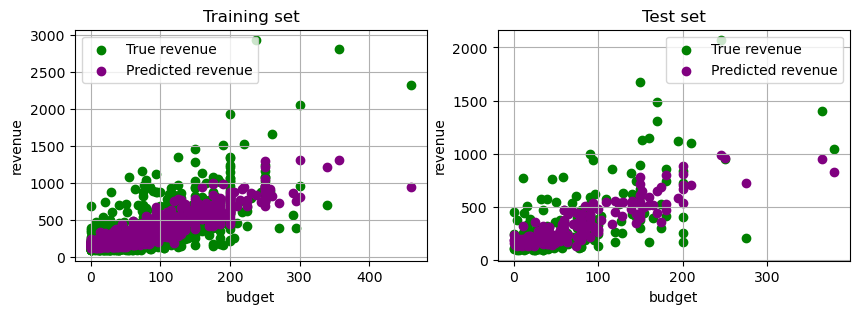

In [36]:
f, ax = plt.subplots(1, 2,figsize=(10, 3))
ax[0].scatter(X_train[['budget']], y_train, color='green')
ax[0].scatter(X_train[['budget']], reg.predict(X_train), color='purple')
ax[0].set_title('Training set')
ax[0].set_xlabel('budget')
ax[0].set_ylabel('revenue')
ax[0].legend(['True revenue', 'Predicted revenue'])
ax[0].grid()
ax[1].scatter(X_test[['budget']], y_test, color='green')
ax[1].scatter(X_test[['budget']], reg.predict(X_test), color='purple')
ax[1].set_title('Test set')
ax[1].set_xlabel('budget')
ax[1].set_ylabel('revenue')
ax[1].legend(['True revenue', 'Predicted revenue'])
ax[1].grid()

plt.show()

# plt.scatter(X_train, y_train, color='green')
# plt.scatter(X_train, reg.predict(X_train), color='purple')

### Feature selection

This is a older version of features, that we do not compute anymore (example : genres). It helped us understanding which features to take.

In [11]:
features = ['budget', 'genre1', 'genre2', 'genre3',
            'popularity', 'runtime', 
            'vote_average', 'vote_count', 'similar_revenues',
            'crew_popularity', 'top_cast_popularity']
label = ['revenue']

In [12]:
movies_df = movies_df.dropna()

features_df = movies_df[features]
features_df[['budget', 'similar_revenues']] = features_df[['budget', 'similar_revenues']]/scaling_factor
target = movies_df[label]/scaling_factor

/home/julien/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [21]:
target = np.ravel(np.array(target))

In [24]:
from sklearn.feature_selection import SelectKBest, f_classif, RFE
from sklearn.ensemble import RandomForestRegressor

scores = list()
for n_features in range(2, 10):
    acs = []
    for sel in ['rfe', 'kbest']:
        if sel == 'rfe':
            selector = RFE(RandomForestRegressor(random_state = 0), n_features_to_select=n_features)
            selector.fit(features_df, target)
        elif sel == 'kbest': 
            selector = SelectKBest(f_classif, k=n_features)
            selector.fit(features_df, target)
        # Get columns to keep and create new dataframe with those only
        cols_idxs = selector.get_support(indices=True)
        features_df_new = features_df.iloc[:,cols_idxs]
        x = features_df_new
        print(f"Selector {sel}, features are {x.columns}")
        y = target
        X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=0)
        model = RandomForestRegressor(random_state=0)
        model.fit(X_train, y_train)

        # Evaluate model performance using the features from the test set (X_test)
        y_pred = model.predict(X_test)
        metric = mean_squared_error(y_test, y_pred)
        print(f"MSE for selector {sel} and num_features {n_features} is {metric}")
        print('------')
        acs.append(metric)
    scores.append(acs)    


Selector rfe, features are Index(['budget', 'vote_count'], dtype='object')
MSE for selector rfe and num_features 2 is 36699.24473716045
------
Selector kbest, features are Index(['popularity', 'vote_count'], dtype='object')
MSE for selector kbest and num_features 2 is 58116.787133151796
------
Selector rfe, features are Index(['budget', 'popularity', 'vote_count'], dtype='object')
MSE for selector rfe and num_features 3 is 35234.08498508582
------
Selector kbest, features are Index(['budget', 'popularity', 'vote_count'], dtype='object')
MSE for selector kbest and num_features 3 is 35234.08498508582
------
Selector rfe, features are Index(['budget', 'popularity', 'vote_count', 'similar_revenues'], dtype='object')
MSE for selector rfe and num_features 4 is 29831.125410993493
------
Selector kbest, features are Index(['budget', 'popularity', 'vote_average', 'vote_count'], dtype='object')
MSE for selector kbest and num_features 4 is 34291.42101986655
------
Selector rfe, features are Index